In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

df = pd.read_csv('SBAnational.csv')
df.head()

/var/folders/bl/7f1kdky90j199bncllgc2ntc0000gn/T/ipykernel_31590/390901022.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SBAnational.csv')


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [3]:
df.duplicated().sum()

np.int64(0)

In [4]:
df.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312760,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [5]:
df.isna().sum()


LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [6]:
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

In [7]:
df_cleaned = df.drop([
    'SBA_Appv', 'ChgOffPrinGr', 'BalanceGross', 
    'DisbursementGross', 'DisbursementDate', 'ChgOffDate', 
    'RevLineCr', 'ApprovalFY', 'ApprovalDate'
], axis=1)
#dropping target leaking columns , 'RetainedJob', 'CreateJob', 'Term'??

In [8]:
df_cleaned.head(20)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,MIS_Status,GrAppv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,84,4,2.0,0,0,1,0,Y,P I F,"$60,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,60,2,2.0,0,0,1,0,Y,P I F,"$40,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,180,7,1.0,0,0,1,0,N,P I F,"$287,000.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,60,2,1.0,0,0,1,0,Y,P I F,"$35,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,240,14,1.0,7,7,1,0,N,P I F,"$229,000.00"
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,120,19,1.0,0,0,1,0,N,P I F,"$517,000.00"
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,45,45,2.0,0,0,0,0,N,CHGOFF,"$600,000.00"
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,84,1,2.0,0,0,1,0,Y,P I F,"$45,000.00"
8,1000104006,TURTLE BEACH INN,PORT SAINT JOE,FL,32456,CENTENNIAL BANK,FL,721310,297,2,2.0,0,0,1,0,N,P I F,"$305,000.00"
9,1000124001,INTEXT BUILDING SYS LLC,GLASTONBURY,CT,6073,WEBSTER BANK NATL ASSOC,CT,0,84,3,2.0,0,0,1,0,Y,P I F,"$70,000.00"


In [9]:
df_cleaned.isna().sum()

LoanNr_ChkDgt       0
Name               14
City               30
State              14
Zip                 0
Bank             1559
BankState        1566
NAICS               0
Term                0
NoEmp               0
NewExist          136
CreateJob           0
RetainedJob         0
FranchiseCode       0
UrbanRural          0
LowDoc           2582
MIS_Status       1997
GrAppv              0
dtype: int64

In [10]:
df_cleaned.Bank

0                       FIFTH THIRD BANK
1                        1ST SOURCE BANK
2                GRANT COUNTY STATE BANK
3          1ST NATL BK & TR CO OF BROKEN
4                FLORIDA BUS. DEVEL CORP
                       ...              
899159    JPMORGAN CHASE BANK NATL ASSOC
899160    JPMORGAN CHASE BANK NATL ASSOC
899161    RABOBANK, NATIONAL ASSOCIATION
899162                    BANK OF HAWAII
899163              CENTRAL PACIFIC BANK
Name: Bank, Length: 899164, dtype: object

In [11]:
df_cleaned.duplicated(subset=['City','Name']).sum()

np.int64(69610)

<Axes: xlabel='State'>

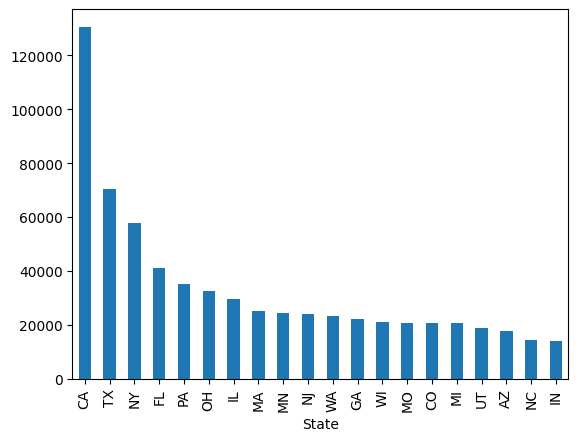

In [12]:
df_cleaned['State'].value_counts().nlargest(20).plot(kind='bar')

In [13]:
df_cleaned['State'].value_counts()

State
CA    130619
TX     70458
NY     57693
FL     41212
PA     35170
OH     32622
IL     29669
MA     25272
MN     24373
NJ     24035
WA     23263
GA     22277
WI     21040
MO     20678
CO     20605
MI     20545
UT     18776
AZ     17631
NC     14294
IN     14132
MD     13269
VA     13264
CT     12229
NH     12109
IA     11996
KS     11464
OR     11051
OK      9950
LA      9576
ID      9498
TN      9403
RI      9028
MT      8749
AL      8362
NV      8024
KY      7723
MS      7686
NE      6386
AR      6341
NM      6033
ME      5944
SC      5597
VT      5454
ND      5245
SD      4431
HI      3610
WV      3287
WY      2839
AK      2405
DE      2220
DC      1613
Name: count, dtype: int64

<Axes: xlabel='City'>

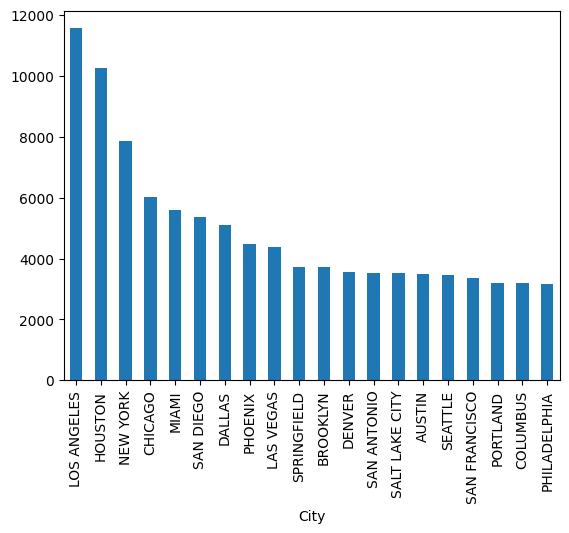

In [14]:
df_cleaned['City'].value_counts().nlargest(20).plot(kind='bar')

In [15]:
df_cleaned['City'].value_counts()


City
LOS ANGELES       11558
HOUSTON           10247
NEW YORK           7846
CHICAGO            6036
MIAMI              5594
                  ...  
STONE MTN.            1
HAZEL                 1
PAWTUCKER             1
WANTOGH               1
SO. OZONE PARK        1
Name: count, Length: 32581, dtype: int64

<Axes: xlabel='Bank'>

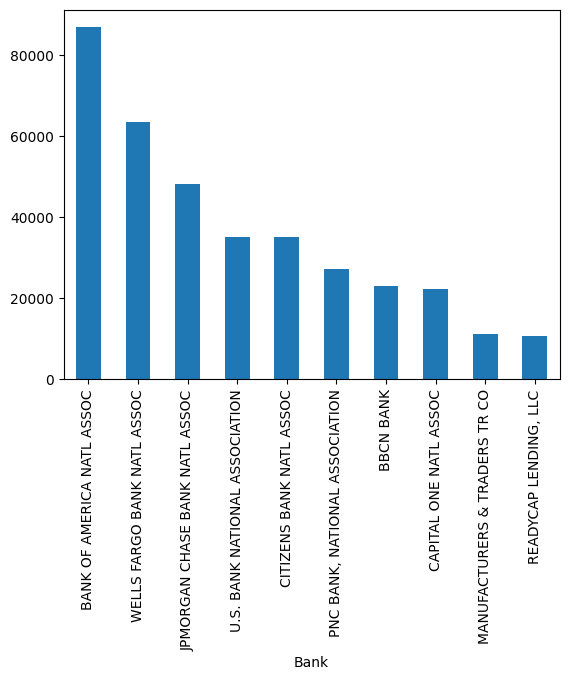

In [16]:
df_cleaned['Bank'].value_counts().nlargest(10).plot(kind='bar')


In [17]:
df_cleaned['Bank'].value_counts()


Bank
BANK OF AMERICA NATL ASSOC        86853
WELLS FARGO BANK NATL ASSOC       63503
JPMORGAN CHASE BANK NATL ASSOC    48167
U.S. BANK NATIONAL ASSOCIATION    35143
CITIZENS BANK NATL ASSOC          35054
                                  ...  
ASTORIA FED. S & L ASSOC              1
TOWN & COUNTRY BANCSHARES, INC        1
WEST MILTON STATE BANK                1
JACKSBORO NATIONAL BANK               1
BAY PORT STATE BANK                   1
Name: count, Length: 5802, dtype: int64

In [18]:
df_cleaned['MIS_Status'].value_counts()
df_cleaned['MIS_Status']
df_cleaned['MIS_Status'].to_csv('data.csv', index=False)

In [19]:
df.iloc[833,:]

LoanNr_ChkDgt                            1005845000
Name                               SPROUT KIDS INC.
City                                     HUNTINGTON
State                                            NY
Zip                                           11743
Bank                 JPMORGAN CHASE BANK NATL ASSOC
BankState                                        IL
NAICS                                        424330
ApprovalDate                               3-Mar-03
ApprovalFY                                     2003
Term                                             84
NoEmp                                             1
NewExist                                        2.0
CreateJob                                         0
RetainedJob                                       0
FranchiseCode                                     1
UrbanRural                                        0
RevLineCr                                         N
LowDoc                                            N
ChgOffDate  

In [20]:
# # Calcul de la matrice de corrélation
# corr_matrix = df_cleaned.corr()

# # Heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title("Matrice de Corrélation")
# plt.show()

In [21]:
df_cleaned['Bank'].unique()

array(['FIFTH THIRD BANK', '1ST SOURCE BANK', 'GRANT COUNTY STATE BANK',
       ..., 'FIRST ILLINOIS BANK', 'COLORADO COMMUNITY FIRST STATE',
       'DEPCO'], shape=(5803,), dtype=object)

In [28]:
df_cleaned['State'].unique()

array(['IN', 'OK', 'FL', 'CT', 'NJ', 'NC', 'IL', 'RI', 'TX', 'VA', 'TN',
       'AR', 'MN', 'MO', 'MA', 'CA', 'SC', 'LA', 'IA', 'OH', 'KY', 'MS',
       'NY', 'MD', 'PA', 'OR', 'ME', 'KS', 'MI', 'AK', 'WA', 'CO', 'MT',
       'WY', 'UT', 'NH', 'WV', 'ID', 'AZ', 'NV', 'WI', 'NM', 'GA', 'ND',
       'VT', 'AL', 'NE', 'SD', 'HI', 'DE', 'DC', nan], dtype=object)